In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydruid.db import connect

df = pd.read_csv(r"D:\2.WORK_DAILY\4.eKGIS_Data Science\Water\data\data_1_9_to_25_9.csv")

C:\Users\phamv\AppData\Local\Temp\ipykernel_33108\442482271.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\2.WORK_DAILY\4.eKGIS_Data Science\Water\data\data_1_9_to_25_9.csv")


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df['datetime'] = pd.to_datetime(df['__time'])
df.head()

,__time,device_key,str_v,parameterid,long_v,bool_v,dbl_v,deviceid,parameter_key,regionid,json_v,extra,kafka.timestamp,kafka.topic,projectid,datetime
0,2020-03-13T09:30:00.000Z,0002,NaN,66f117473ae6a76b97365401,NaN,NaN,0.0,66f113dbbfa5a22a633dc0ec,Pressure 2,66e3b7ddc59413d151221b0f,NaN,NaN,1727245810325,iot_water.public.iot_water_thanhhoa_producer,66d7e1b58badd32061030a4d,2020-03-13 09:30:00+00:00
1,2020-03-13T09:45:00.000Z,0002,NaN,66f117473ae6a76b97365401,NaN,NaN,0.0,66f113dbbfa5a22a633dc0ec,Pressure 2,66e3b7ddc59413d151221b0f,NaN,NaN,1727245810325,iot_water.public.iot_water_thanhhoa_producer,66d7e1b58badd32061030a4d,2020-03-13 09:45:00+00:00
2,2020-03-13T10:00:00.000Z,0002,NaN,66f117473ae6a76b97365401,NaN,NaN,0.0,66f113dbbfa5a22a633dc0ec,Pressure 2,66e3b7ddc59413d151221b0f,NaN,NaN,1727245810327,iot_water.public.iot_water_thanhhoa_producer,66d7e1b58badd32061030a4d,2020-03-13 10:00:00+00:00
3,2020-03-13T10:15:00.000Z,0002,NaN,66f117473ae6a76b97365401,NaN,NaN,0.0,66f113dbbfa5a22a633dc0ec,Pressure 2,66e3b7ddc59413d151221b0f,NaN,NaN,1727245810327,iot_water.public.iot_water_thanhhoa_producer,66d7e1b58badd32061030a4d,2020-03-13 10:15:00+00:00
4,2020-03-13T10:30:00.000Z,0002,NaN,66f117473ae6a76b97365401,NaN,NaN,0.0,66f113dbbfa5a22a633dc0ec,Pressure 2,66e3b7ddc59413d151221b0f,NaN,NaN,1727245810328,iot_water.public.iot_water_thanhhoa_producer,66d7e1b58badd32061030a4d,2020-03-13 10:30:00+00:00


In [4]:
mapping = {
    'Pressure': 'Áp lực', 'Pressure1': 'Áp lực', 'P': 'Áp lực', 'PS1': 'Áp lực',
    'Flow 1': 'Lưu lượng thuận', 'Flow1': 'Lưu lượng thuận', 'Q': 'Lưu lượng thuận', 'FF1': 'Lưu lượng thuận',
    'Flow 2': 'Lưu lượng nghịch', 'Flow2': 'Lưu lượng nghịch', 'RF1': 'Lưu lượng nghịch', 'ReverseFlowSum': 'Lưu lượng nghịch',
    'ForwardIndex': 'Chỉ số thuận', 'Input1_J1': 'Chỉ số thuận',
    'SignalStrength': 'Cường độ sóng',
    'Vbat': 'Dung lượng pin',
    'Temperature': 'Nhiệt độ',
    'Net': 'Chỉ số Net',
    'RIN': 'Chỉ số nghịch'
}

In [5]:
df['parameter'] = df['parameter_key'].replace(mapping, inplace=False)

In [6]:
data_temp = df[df['parameter'] == 'Nhiệt độ']

In [7]:
data_temp.describe()

,str_v,long_v,bool_v,dbl_v,json_v,extra,kafka.timestamp
count,0.0,0.0,0.0,18308.000000,0.0,0.0,1.830800e+04
mean,NaN,NaN,NaN,27.814999,NaN,NaN,1.726572e+12
std,NaN,NaN,NaN,2.134731,NaN,NaN,2.042141e+08
min,NaN,NaN,NaN,23.000000,NaN,NaN,1.726460e+12
25%,NaN,NaN,NaN,26.000000,NaN,NaN,1.726460e+12
50%,NaN,NaN,NaN,27.000000,NaN,NaN,1.726461e+12
75%,NaN,NaN,NaN,29.000000,NaN,NaN,1.726595e+12
max,NaN,NaN,NaN,41.000000,NaN,NaN,1.727059e+12


#### **Phân tích trên một số thiết bị cụ thể**

array(['66d92f68d26d47098c63849a', '66d92f70d26d47098c638502',
       '66d92f60d26d47098c638421', '66d92f61d26d47098c638436',
       '66d92f63d26d47098c638452', '66d92f65d26d47098c63846e',
       '66d92f69d26d47098c63849f', '66d92f69d26d47098c6384a5',
       '66d92f6ad26d47098c6384af', '66d92f6ad26d47098c6384b9',
       '66d92f6dd26d47098c6384d5', '66d92f6dd26d47098c6384dd',
       '66d92f68d26d47098c638494', '66d92f6dd26d47098c6384dc'],
      dtype=object)

##### Chọn thiết bị

In [8]:
deviced = '66d92f94b7f41dd37df0634a'

In [9]:
data_temp['deviceid'].unique().tolist()

['66d92f68d26d47098c63849a',
 '66d92f70d26d47098c638502',
 '66d92f60d26d47098c638421',
 '66d92f61d26d47098c638436',
 '66d92f63d26d47098c638452',
 '66d92f65d26d47098c63846e',
 '66d92f69d26d47098c63849f',
 '66d92f69d26d47098c6384a5',
 '66d92f6ad26d47098c6384af',
 '66d92f6ad26d47098c6384b9',
 '66d92f6dd26d47098c6384d5',
 '66d92f6dd26d47098c6384dd',
 '66d92f68d26d47098c638494',
 '66d92f6dd26d47098c6384dc']

In [10]:
for i in data_temp['deviceid'].unique().tolist():
    df_deviced = data_temp[data_temp['deviceid'] == i]
    print(df_deviced.shape)

(1193, 17)
(3168, 17)
(1053, 17)
(1056, 17)
(1056, 17)
(1056, 17)
(668, 17)
(1056, 17)
(1056, 17)
(857, 17)
(1054, 17)
(3169, 17)
(1055, 17)
(811, 17)


In [11]:
df_deviced = data_temp[data_temp['deviceid'] ==  '66d92f70d26d47098c638502']
df_deviced = df_deviced[['datetime', 'dbl_v']]
df_deviced.head()

,datetime,dbl_v
10294,2024-09-01 00:00:04+00:00,28.0
10929,2024-09-01 00:10:03+00:00,28.0
11467,2024-09-01 00:20:04+00:00,28.0
12072,2024-09-01 00:30:04+00:00,28.0
12741,2024-09-01 00:40:04+00:00,29.0


In [12]:
df_deviced['minute'] = df_deviced['datetime'].dt.minute
df_deviced['hour']   = df_deviced['datetime'].dt.hour
df_deviced['minute'] = df_deviced['minute'] + df_deviced['hour']*60
df_deviced['day'] = df_deviced['datetime'].dt.day
display(df_deviced.head())

,datetime,dbl_v,minute,hour,day
10294,2024-09-01 00:00:04+00:00,28.0,0,0,1
10929,2024-09-01 00:10:03+00:00,28.0,10,0,1
11467,2024-09-01 00:20:04+00:00,28.0,20,0,1
12072,2024-09-01 00:30:04+00:00,28.0,30,0,1
12741,2024-09-01 00:40:04+00:00,29.0,40,0,1


In [13]:
def SensorViz(df, feature_X, feature_y, savefig = False):
    plt.figure(figsize=(18,5))
    plt.scatter(df[feature_X],df[feature_y])
    plt.plot(df[feature_X],df[feature_y])
    plt.title(f'{feature_X} Vs {feature_y}', size = 20)
    plt.xlabel(feature_X, size = 20)
    plt.ylabel(feature_y, size = 20)
    plt.grid()
    if(savefig):
        plt.savefig(f'{feature_X} Vs {feature_y} Analysis.jpg')

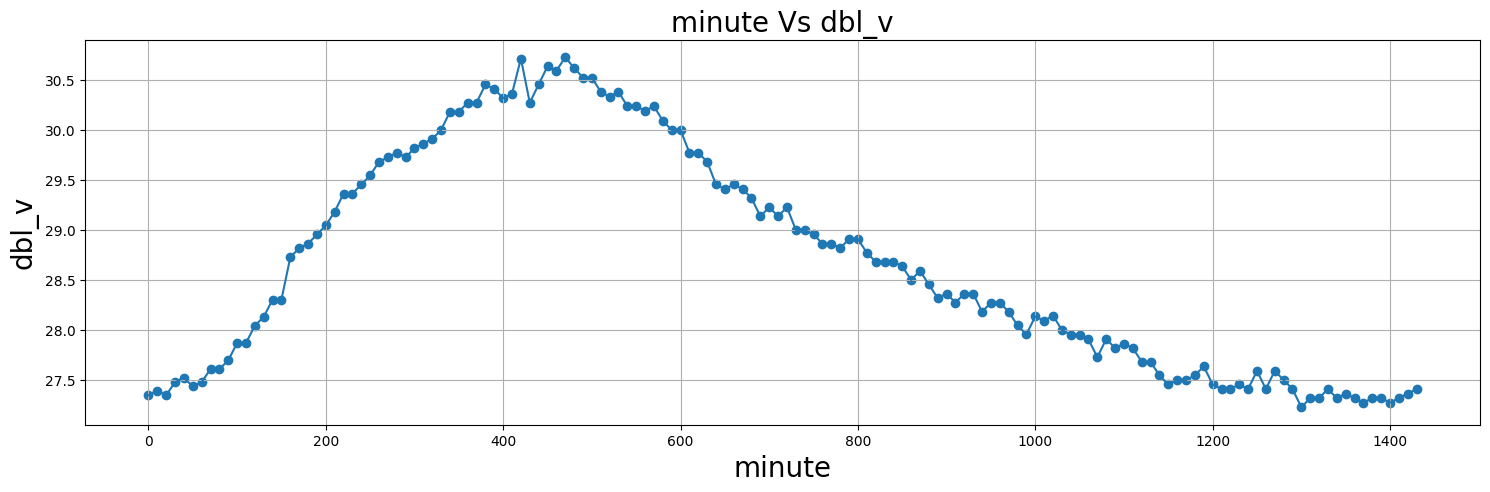

In [14]:
feature_y = "dbl_v"

feature_X = "minute"
data_group = df_deviced[[feature_X, feature_y]].groupby(feature_X,as_index=False).mean()
SensorViz(data_group, feature_X, feature_y)

In [26]:
feature_X = 'minute'
feature_y = 'dbl_v'
data_group = df_deviced[[feature_X, feature_y]].groupby(feature_X,as_index=False).mean()

X=data_group[[feature_X]].values
y=data_group[feature_y].values

In [27]:
data_group

,minute,dbl_v
0,0,27.347826
1,10,27.391304
2,20,27.347826
3,30,27.478261
4,40,27.521739
...,...,...
139,1390,27.318182
140,1400,27.272727
141,1410,27.318182
142,1420,27.363636


In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
print(X_poly[:6])

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04 1.000e+05]
 [1.000e+00 2.000e+01 4.000e+02 8.000e+03 1.600e+05 3.200e+06]
 [1.000e+00 3.000e+01 9.000e+02 2.700e+04 8.100e+05 2.430e+07]
 [1.000e+00 4.000e+01 1.600e+03 6.400e+04 2.560e+06 1.024e+08]
 [1.000e+00 5.000e+01 2.500e+03 1.250e+05 6.250e+06 3.125e+08]]


In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [18]:
print("Incorrect Input :", X_poly[0])
print("Correct Input :", X_poly[0].reshape(1, -1))
print("Output : ", lin_reg.predict(X_poly[0].reshape(1, -1)))

Incorrect Input : [1. 0. 0. 0. 0. 0.]
Correct Input : [[1. 0. 0. 0. 0. 0.]]
Output :  [26.98288946]


In [19]:
y_predict = lin_reg.predict(poly_reg.fit_transform(X))
print(f"true {feature_y} value : \n {y}")
print(f"predicted {feature_y} value : \n {y_predict}")

true dbl_v value : 
 [27.34782609 27.39130435 27.34782609 27.47826087 27.52173913 27.43478261
 27.47826087 27.60869565 27.60869565 27.69565217 27.86956522 27.86956522
 28.04347826 28.13043478 28.30434783 28.30434783 28.72727273 28.81818182
 28.86363636 28.95454545 29.04545455 29.18181818 29.36363636 29.36363636
 29.45454545 29.54545455 29.68181818 29.72727273 29.77272727 29.72727273
 29.81818182 29.86363636 29.90909091 30.         30.18181818 30.18181818
 30.27272727 30.27272727 30.45454545 30.40909091 30.31818182 30.36363636
 30.71428571 30.27272727 30.45454545 30.63636364 30.59090909 30.72727273
 30.61904762 30.52380952 30.52380952 30.38095238 30.33333333 30.38095238
 30.23809524 30.23809524 30.19047619 30.23809524 30.09090909 30.
 30.         29.77272727 29.77272727 29.68181818 29.45454545 29.40909091
 29.45454545 29.40909091 29.31818182 29.13636364 29.22727273 29.13636364
 29.22727273 29.         29.         28.95454545 28.86363636 28.86363636
 28.81818182 28.90909091 28.90909091 2

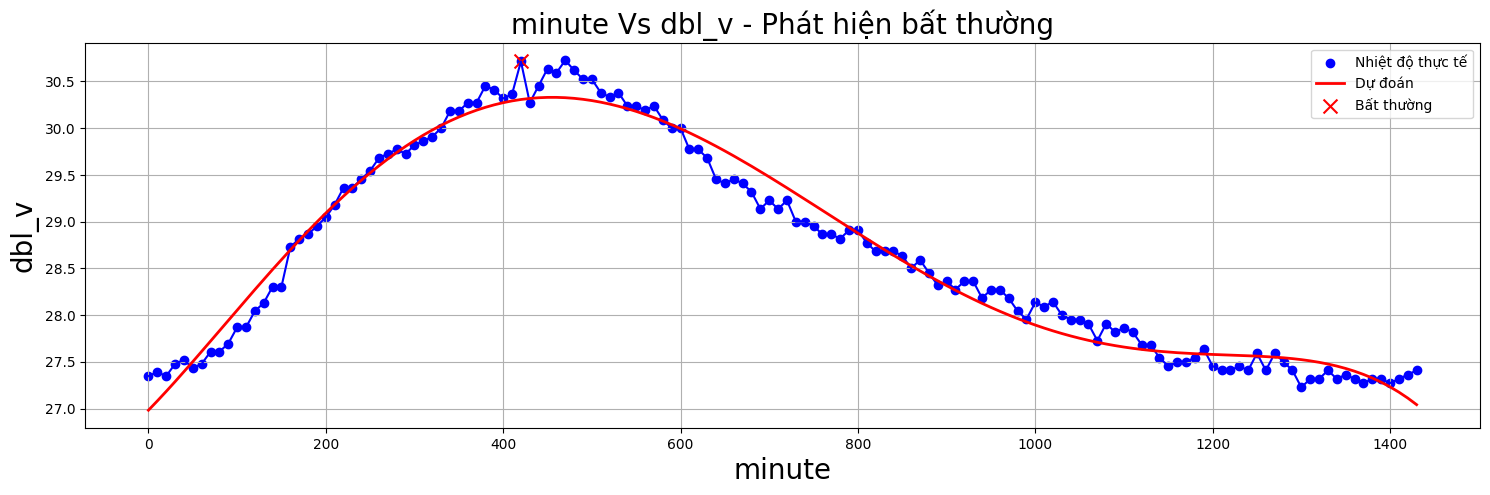

In [20]:

# Hàm phát hiện và đánh dấu bất thường dựa vào độ lệch chuẩn của sai số và sự chênh lệch giữa các phút
def detect_anomalies(df, feature_y):
    df['diff_prev'] = df[feature_y].diff().abs()  # Sự chênh lệch với điểm trước
    df['diff_next'] = df[feature_y].diff(-1).abs()  # Sự chênh lệch với điểm sau
    std_diff_prev = df['diff_prev'].std()
    std_diff_next = df['diff_next'].std()
    threshold_prev = 3 * std_diff_prev
    threshold_next = 3 * std_diff_next
    df['anomaly'] = df.apply(lambda row: 1 if row['diff_prev'] > threshold_prev and row['diff_next'] > threshold_next else 0, axis=1)
    return df, (threshold_prev, threshold_next)

def SensorVizWithPrediction(df, feature_X, feature_y, y_predict, savefig=False):
    plt.figure(figsize=(18,5))
    plt.scatter(df[feature_X], df[feature_y], label='Nhiệt độ thực tế', color='blue')
    plt.plot(df[feature_X], df[feature_y], color='blue')
    plt.plot(df[feature_X], y_predict, color='red', linewidth=2, label='Dự đoán')
    anomalies = df[df['anomaly'] == 1]
    plt.scatter(anomalies[feature_X], anomalies[feature_y], color='red', marker='x', s=100, label='Bất thường')
    plt.title(f'{feature_X} Vs {feature_y} - Phát hiện bất thường', size=20)
    plt.xlabel(feature_X, size=20)
    plt.ylabel(feature_y, size=20)
    plt.legend()
    plt.grid()

    if savefig:
        plt.savefig(f'{feature_X} Vs {feature_y} Analysis.jpg')

    plt.show()
data_group, threshold = detect_anomalies(data_group, feature_y)
SensorVizWithPrediction(data_group, feature_X, feature_y, y_predict)


<Figure size 2000x500 with 0 Axes>

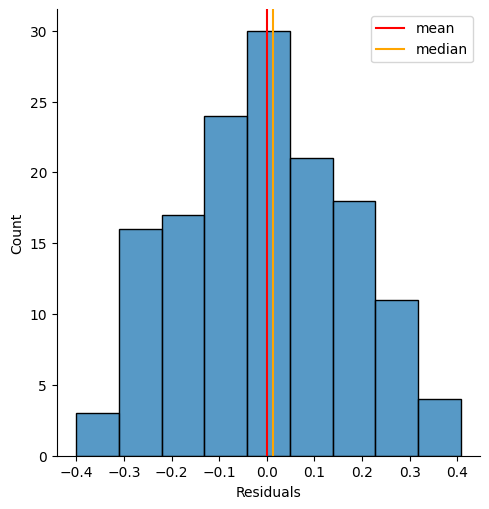

In [21]:
# Model Assessment
residuals = y - y_predict
plt.figure(figsize=(20,5))
sns.displot(residuals)
plt.axvline(x = np.mean(residuals), color = 'red', label = 'mean')
plt.axvline(x = np.median(residuals), color = 'orange', label = 'median')
plt.xlabel("Residuals")
plt.legend(loc = "upper right")
plt.show()

In [22]:
std = np.std(residuals)
y_predict_upBound = y_predict + 3*std
y_predict_lowBound = y_predict - 3*std

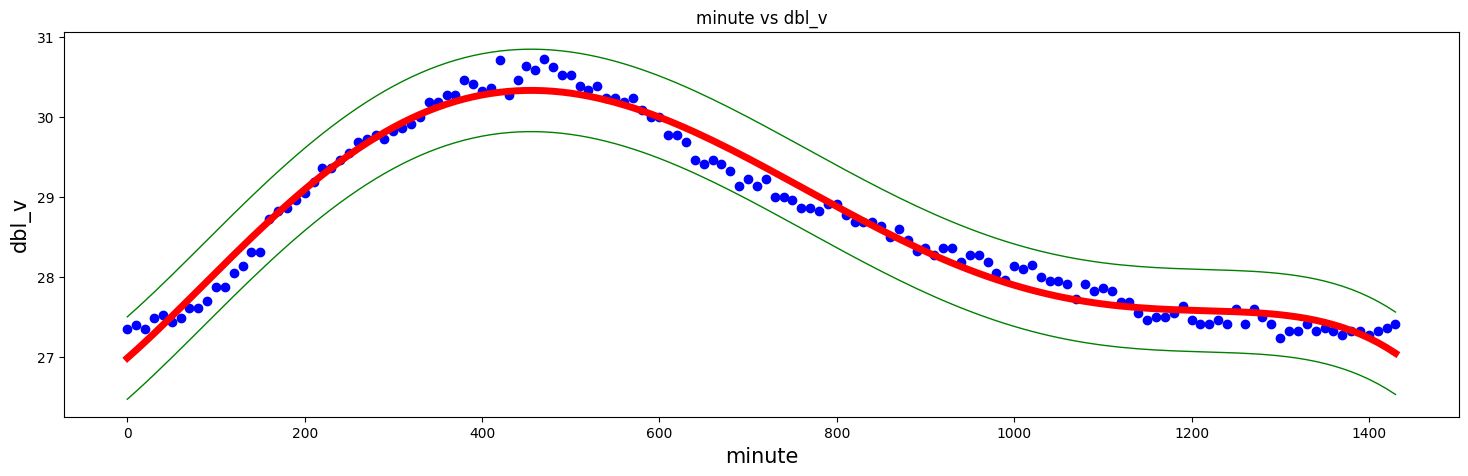

In [23]:
plt.figure(figsize=(18, 5))
plt.scatter(X,y, color = "blue")
plt.plot(X, y_predict, color = "red", linewidth = 5)
plt.plot(X, y_predict_upBound, color = "green", linewidth = 1)
plt.plot(X, y_predict_lowBound, color = "green", linewidth = 1)
plt.title(f"{feature_X} vs {feature_y}")
plt.xlabel(feature_X, size = 15)
plt.ylabel(feature_y, size = 15)
plt.show()

In [24]:
LogDF = pd.DataFrame(columns = ["minute", "true_temp", "predicted_temp", "conf_lower", "conf_upper"])
LogDF["minute"] = X.reshape(-1)
LogDF["true_temp"] = y
LogDF["predicted_temp"] = y_predict
LogDF["conf_lower"] = y_predict_lowBound
LogDF["conf_upper"] = y_predict_upBound
LogDF["Alarm"] = (LogDF["true_temp"] < LogDF["conf_lower"]) | (LogDF["true_temp"] > LogDF["conf_upper"])
display(LogDF.head())
print("Alarm Time : ")
print(LogDF[LogDF["Alarm"] == True])

,minute,true_temp,predicted_temp,conf_lower,conf_upper,Alarm
0,0,27.347826,26.982889,26.467504,27.498275,False
1,10,27.391304,27.081916,26.566531,27.597301,False
2,20,27.347826,27.183799,26.668413,27.699184,False
3,30,27.478261,27.288107,26.772722,27.803492,False
4,40,27.521739,27.394427,26.879042,27.909813,False


Alarm Time : 
Empty DataFrame
Columns: [minute, true_temp, predicted_temp, conf_lower, conf_upper, Alarm]
Index: []


### **Save Model**

In [25]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.
